<a href="https://colab.research.google.com/github/Ransaka/FaceDetector/blob/master/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re 
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os
os.listdir()

['.ipynb_checkpoints',
 'cleaned data',
 'cleaned datacleaned_test.csv',
 'cleaned datacleaned_validate.csv',
 'cleaning.ipynb',
 'DataStorm2.0_Q1-v2.pdf',
 'final',
 'final_test.csv',
 'final_train.csv',
 'final_validate.csv',
 'Hotel-A-data-dictionary.csv',
 'Hotel-A-test.csv',
 'Hotel-A-train.csv',
 'Hotel-A-validation.csv',
 'model',
 'New folder',
 'predict.ipynb',
 'prep.ipynb',
 'scaled_and_selected_features_train.csv',
 'scaled_and_selected_features_validate.csv',
 'xgb_new']

In [ ]:
plt.rcParams['figure.figsize']=[15,10]

In [ ]:
data = pd.read_csv('Hotel-A-validation.csv')

In [ ]:
data.head(15)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
5,58998216,F,59,African American,High-School,25K --50K,South,Airport Hotels,8/31/2016,9/3/2016,...,BB,Yes,No,Non-Refundable,Online,No,Canceled,No,0,184
6,64307850,F,59,caucasian,Grad,50K -- 100K,South,Airport Hotels,8/31/2016,9/3/2016,...,HB,Yes,No,Refundable,Agent,No,No-Show,Yes,5,165
7,79949146,M,47,caucasian,College,50K -- 100K,West,City Hotel,8/31/2016,9/1/2016,...,BB,No,No,No Deposit,Online,No,Canceled,No,0,204
8,95113258,F,58,African American,High-School,>100K,North,Airport Hotels,8/31/2016,9/1/2016,...,BB,No,No,No Deposit,Direct,Yes,Check-In,No,0,143
9,24700715,F,48,Latino,Grad,25K --50K,South,Resort,8/31/2016,9/1/2016,...,FB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,126


In [ ]:
data.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [ ]:
test = pd.read_csv('Hotel-A-test.csv')

In [ ]:
test.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [ ]:
d0 =  {}
for col in data.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date','Room_Rate','Age'],axis=1).columns:
    d0[col] = list(data[col].unique())
# pd.DataFrame(d0)

In [ ]:
d0

{'Gender': ['M', 'F'],
 'Ethnicity': ['caucasian', 'Latino', 'Asian American', 'African American'],
 'Educational_Level': ['Grad', 'College', 'High-School', 'Mid-School'],
 'Income': ['<25K', '25K --50K', '50K -- 100K', '>100K'],
 'Country_region': ['West', 'North', 'East', 'South'],
 'Hotel_Type': ['Resort', 'Airport Hotels', 'City Hotel'],
 'Adults': [2, 3, 1, 4, 5],
 'Children': [2, 1, 3],
 'Babies': [0, 1, 2],
 'Meal_Type': ['HB', 'FB', 'BB'],
 'Visted_Previously': ['No', 'Yes'],
 'Previous_Cancellations': ['No', 'Yes'],
 'Deposit_type': ['No Deposit', 'Refundable', 'Non-Refundable'],
 'Booking_channel': ['Agent', 'Online', 'Direct'],
 'Required_Car_Parking': ['No', 'Yes'],
 'Reservation_Status': ['No-Show', 'Canceled', 'Check-In'],
 'Use_Promotion': ['Yes', 'No'],
 'Discount_Rate': [15, 0, 10, 25, 5, 20, 40, 30]}

In [ ]:
data.shape

(2749, 24)

In [ ]:
test.shape

(4318, 23)

In [ ]:
# data['Expected_checkin_'] = 
test.Expected_checkin.apply(lambda x: x.split('/'))

0       [11, 18, 2016]
1       [11, 18, 2016]
2        [4, 28, 2017]
3       [11, 18, 2016]
4       [11, 18, 2016]
             ...      
4313     [3, 29, 2017]
4314     [3, 29, 2017]
4315     [3, 29, 2017]
4316     [3, 29, 2017]
4317     [3, 29, 2017]
Name: Expected_checkin, Length: 4318, dtype: object

In [ ]:
test['Expected_checkin_Year'] = test.Expected_checkin.apply(lambda x: x.split('/')[2])
test['Expected_checkin_Day'] = test.Expected_checkin.apply(lambda x: x.split('/')[1])
test['Expected_checkin_Month'] = test.Expected_checkin.apply(lambda x: x.split('/')[0])

In [ ]:
test

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,...,No,No Deposit,Direct,Yes,Yes,10,153,2016,18,11
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,...,No,No Deposit,Online,No,No,0,210,2016,18,11
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,...,No,No Deposit,Agent,No,Yes,5,117,2017,28,4
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,...,No,No Deposit,Online,Yes,Yes,10,107,2016,18,11
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,...,No,Refundable,Agent,No,No,0,119,2016,18,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,M,53,Latino,College,50K -- 100K,South,Resort,3/29/2017,3/30/2017,...,No,Non-Refundable,Online,Yes,No,0,153,2017,29,3
4314,5496554,F,63,caucasian,College,50K -- 100K,South,Resort,3/29/2017,4/1/2017,...,No,Refundable,Agent,Yes,Yes,40,233,2017,29,3
4315,59004046,F,59,caucasian,Grad,<25K,East,Airport Hotels,3/29/2017,3/30/2017,...,No,No Deposit,Direct,Yes,No,0,242,2017,29,3
4316,65838682,M,43,African American,College,25K --50K,West,Resort,3/29/2017,3/30/2017,...,No,No Deposit,Online,Yes,No,0,208,2017,29,3


<AxesSubplot:>

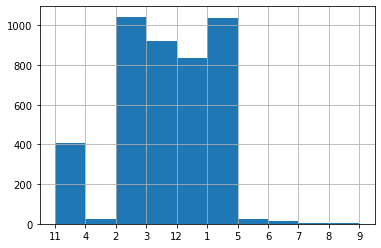

In [ ]:
test.Expected_checkin_Month.hist()

In [ ]:
from datetime import datetime

In [ ]:
# x = datetime([1900, 11, 21]).date() - datetime(1900, 12, 21).date()

In [ ]:
# x.days

In [ ]:
test[test.Expected_checkin.apply(lambda x: False if len(x.split('/')[2])==4 else True)]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month


In [ ]:
test[test.Expected_checkout.apply(lambda x: False if len(x.split('/')[2])==4 else True)]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month


In [ ]:
def get_time_differ(row):
    chekin = row['Expected_checkin'].split('/')
#     print(chekin)
    out = row['Expected_checkout'].split('/')
    dd = datetime(int(out[2]),int(out[0]),int(out[1]))-datetime(int(chekin[2]),int(chekin[0]),int(chekin[1]))
    return dd.days

## Calculate to expected days of checkin

In [ ]:
test['expected_days_of_checkin'] = test.apply(get_time_differ,axis=1)

<AxesSubplot:>

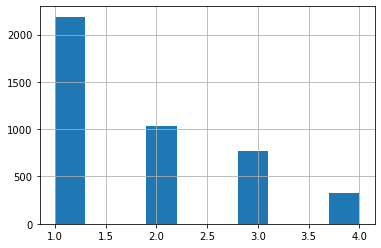

In [ ]:
test['expected_days_of_checkin'].hist()

In [ ]:
# test[test['expected_days_of_checkin']==4]['Reservation_Status']

In [ ]:
def get_time_differ_booking(row):
    out = row['Expected_checkin'].split('/')
#     print(chekin)
    chekin = row['Booking_date'].split('/')
    dd = datetime(int(out[2]),int(out[0]),int(out[1]))-datetime(int(chekin[2]),int(chekin[0]),int(chekin[1]))
    return dd.days

In [ ]:
test['booked_before_n_days'] = test.apply(get_time_differ_booking,axis=1)

<AxesSubplot:>

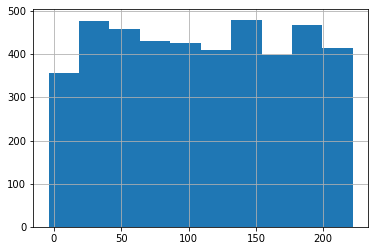

In [ ]:
test['booked_before_n_days'].hist()

In [ ]:
min(test['booked_before_n_days'])

-4

In [ ]:
max(test['booked_before_n_days'])

222

In [ ]:
test[test['booked_before_n_days']==222]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days
448,97178538,F,47,Asian American,College,25K --50K,East,Airport Hotels,12/2/2016,12/3/2016,...,Online,Yes,Yes,10,249,2016,2,12,1,222
1201,26635402,M,51,African American,College,25K --50K,South,Resort,12/29/2016,12/30/2016,...,Online,Yes,Yes,40,235,2016,29,12,1,222
1974,54944571,M,66,Latino,High-School,>100K,East,City Hotel,1/19/2017,1/20/2017,...,Direct,Yes,No,0,138,2017,19,1,1,222


In [ ]:
test[test['booked_before_n_days']>366]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days


In [ ]:
test[test['booked_before_n_days']==-4]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days
439,67139468,M,70,Latino,College,25K --50K,West,Airport Hotels,12/1/2016,12/5/2016,...,Online,Yes,Yes,40,239,2016,1,12,4,-4


<AxesSubplot:>

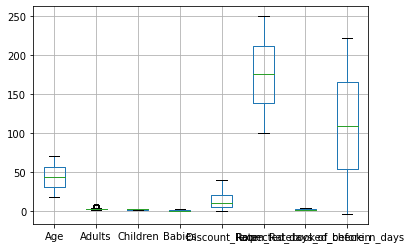

In [ ]:
test.drop(['Reservation-id'],axis=1).boxplot()

In [ ]:
import seaborn as sns

<AxesSubplot:ylabel='booked_before_n_days'>

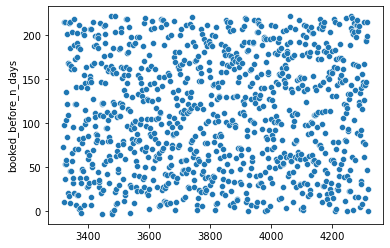

In [ ]:
sns.scatterplot(y='booked_before_n_days',x=test.tail(1000).index,data=test.tail(1000))

In [ ]:
# sns.barplot(y='booked_before_n_days',x=data.tail(10000).index,data=data.tail(10000),hue='Reservation_Status')

## Calculate the isWeekend column

In [ ]:
import calendar
from datetime import date

In [ ]:
my_date = datetime(2021, 3, 14).date()
calendar.day_name[my_date.weekday()]

'Sunday'

In [ ]:
my_date

datetime.date(2021, 3, 14)

In [ ]:
# 10/24/2015
def get_is_weekend(row):
    chekin = row['Expected_checkin'].split('/')
    my_date = datetime(int(chekin[2]),int(chekin[0]),int(chekin[1]))
    my_day = calendar.day_name[my_date.weekday()]
    if my_day in ['Friday','Saturday','Sunday']:
        return 1
    else:
        return 0

In [ ]:
test['isWeekend_trip'] = test.apply(get_is_weekend,axis=1)

In [ ]:
test[test['isWeekend_trip']==1]

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Day,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,...,Yes,Yes,10,153,2016,18,11,1,21,1
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,...,No,No,0,210,2016,18,11,1,104,1
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,...,No,Yes,5,117,2017,28,4,3,20,1
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,...,Yes,Yes,10,107,2016,18,11,2,182,1
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,...,No,No,0,119,2016,18,11,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,25770218,F,23,caucasian,Mid-School,<25K,North,City Hotel,3/26/2017,3/27/2017,...,Yes,Yes,20,168,2017,26,3,1,68,1
4241,95240894,M,52,Latino,High-School,25K --50K,East,Resort,3/26/2017,3/27/2017,...,Yes,Yes,20,204,2017,26,3,1,12,1
4242,8595533,F,68,caucasian,Grad,<25K,East,City Hotel,3/26/2017,3/28/2017,...,Yes,Yes,30,166,2017,26,3,2,149,1
4259,17483904,M,19,caucasian,College,<25K,North,Airport Hotels,3/31/2017,4/3/2017,...,Yes,No,0,124,2017,31,3,3,188,1


In [ ]:
test.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Expected_checkin_Year',
       'Expected_checkin_Day', 'Expected_checkin_Month',
       'expected_days_of_checkin', 'booked_before_n_days', 'isWeekend_trip'],
      dtype='object')

In [ ]:
data_prep = test.drop(['Expected_checkin','Expected_checkout','Booking_date','Expected_checkin_Day'],axis=1)

In [ ]:
data_prep

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,3,3,...,Direct,Yes,Yes,10,153,2016,11,1,21,1
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,2,1,...,Online,No,No,0,210,2016,11,1,104,1
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,2,2,...,Agent,No,Yes,5,117,2017,4,3,20,1
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,1,3,...,Online,Yes,Yes,10,107,2016,11,2,182,1
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,3,1,...,Agent,No,No,0,119,2016,11,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,M,53,Latino,College,50K -- 100K,South,Resort,3,3,...,Online,Yes,No,0,153,2017,3,1,199,0
4314,5496554,F,63,caucasian,College,50K -- 100K,South,Resort,3,3,...,Agent,Yes,Yes,40,233,2017,3,3,47,0
4315,59004046,F,59,caucasian,Grad,<25K,East,Airport Hotels,2,3,...,Direct,Yes,No,0,242,2017,3,1,215,0
4316,65838682,M,43,African American,College,25K --50K,West,Resort,4,2,...,Online,Yes,No,0,208,2017,3,1,25,0


In [ ]:
data_prep.Expected_checkin_Month = data_prep.Expected_checkin_Month.apply(int)

In [ ]:
data_prep.Expected_checkin_Year      = data_prep.Expected_checkin_Year.apply(int)

In [ ]:
# data_prep['isCancelled']  = data_prep.Reservation_Status.apply(lambda x: 1 if x.lower() in ['canceled'] else 0)

In [ ]:
data_prep.sample(5)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
2302,99540478,F,37,Latino,Mid-School,25K --50K,West,City Hotel,5,2,...,Online,Yes,Yes,25,119,2017,1,3,77,1
3313,44045426,M,53,caucasian,College,50K -- 100K,West,Airport Hotels,5,2,...,Agent,No,Yes,40,126,2017,2,1,110,1
495,43778704,F,44,caucasian,Mid-School,<25K,South,Resort,2,2,...,Online,Yes,No,0,210,2016,12,3,84,1
4035,46285920,F,37,caucasian,Grad,50K -- 100K,South,City Hotel,2,3,...,Direct,Yes,Yes,40,149,2017,3,3,162,1
1199,72464404,M,35,Asian American,College,50K -- 100K,South,Airport Hotels,2,2,...,Online,Yes,Yes,5,192,2016,12,2,194,0


In [ ]:
data_prep.dtypes[data_prep.dtypes=='object']

Gender                    object
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Use_Promotion             object
dtype: object

In [ ]:
import os

In [ ]:
cleaned_loc = os.path.join(r"F:\Kaggle\DataStorm\data-storm-20\cleaned data")

In [ ]:
data_prep.to_csv(cleaned_loc+'/cleaned_test4000row.csv')

In [ ]:
pd.read_csv(cleaned_loc+'/cleaned_test4000row.csv')

,Unnamed: 0,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,3,...,Direct,Yes,Yes,10,153,2016,11,1,21,1
1,1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,2,...,Online,No,No,0,210,2016,11,1,104,1
2,2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,2,...,Agent,No,Yes,5,117,2017,4,3,20,1
3,3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,1,...,Online,Yes,Yes,10,107,2016,11,2,182,1
4,4,80931528,M,45,African American,College,25K --50K,South,City Hotel,3,...,Agent,No,No,0,119,2016,11,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,4313,39110574,M,53,Latino,College,50K -- 100K,South,Resort,3,...,Online,Yes,No,0,153,2017,3,1,199,0
4314,4314,5496554,F,63,caucasian,College,50K -- 100K,South,Resort,3,...,Agent,Yes,Yes,40,233,2017,3,3,47,0
4315,4315,59004046,F,59,caucasian,Grad,<25K,East,Airport Hotels,2,...,Direct,Yes,No,0,242,2017,3,1,215,0
4316,4316,65838682,M,43,African American,College,25K --50K,West,Resort,4,...,Online,Yes,No,0,208,2017,3,1,25,0


## END

In [ ]:
test_df = pd.get_dummies(data_prep.drop(['Reservation-id','Reservation_Status','Expected_checkin_Year'],axis=1))

In [ ]:
test_df.head().transpose()

,0,1,2,3,4
Age,40,49,42,25,62
Adults,2,3,3,4,1
Children,2,3,3,3,1
Babies,0,0,0,0,0
Discount_Rate,10,0,0,5,10
Room_Rate,218,185,119,144,242
Expected_checkin_Month,7,7,7,7,7
expected_days_of_checkin,1,1,4,1,1
booked_before_n_days,41,36,3,12,13
isWeekend,0,0,0,0,1


In [ ]:
# test_df.drop(['Reservation-id'],axis=1).hist()

# Deletion part

In [ ]:
test_df=test_df[test_df['booked_before_n_days'].apply(lambda x:True if int(x)<300 else False)]

In [ ]:
test_df['booked_before_n_days']

0         41
1         36
2          3
3         12
4         13
        ... 
27494     37
27495    127
27496      9
27497     98
27498     65
Name: booked_before_n_days, Length: 26858, dtype: int64

In [ ]:
data_prep=data_prep[data_prep['booked_before_n_days'].apply(lambda x:True if int(x)<300 else False)]

In [ ]:
from sklearn.preprocessing import Normalizer,LabelEncoder

In [ ]:
normalize = Normalizer()

In [ ]:
test_df = pd.DataFrame(normalize.fit_transform(test_df),columns=test_df.columns,index=test_df.index)

<AxesSubplot:>

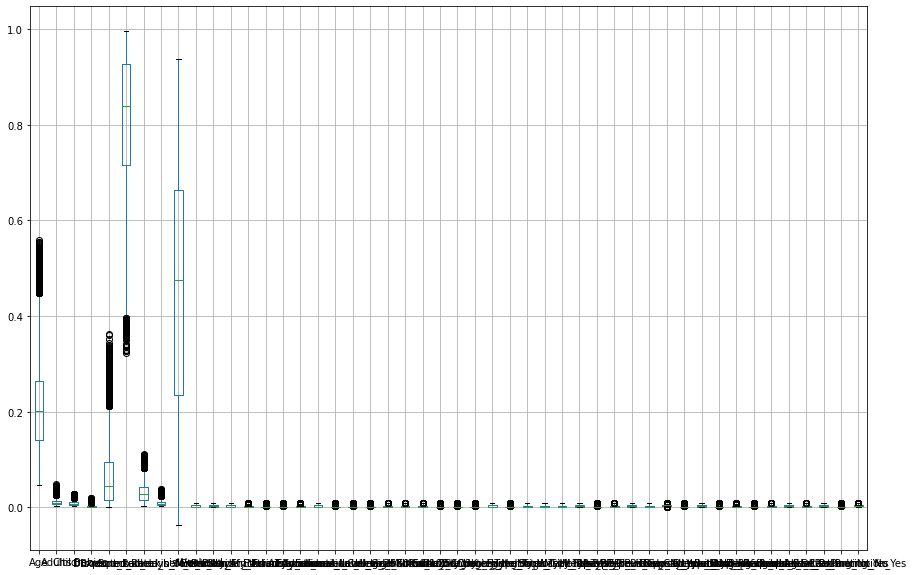

In [ ]:
test_df.boxplot()

In [ ]:
features = test_df

In [ ]:
le = LabelEncoder()

In [ ]:
target = data_prep['Reservation_Status']

In [ ]:
target = le.fit_transform(target)

## Jump to random decision tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split

## Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=2, random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8466832129963899

In [ ]:
clf.feature_importances_

array([1.79829025e-02, 1.62677992e-03, 8.13400688e-03, 4.63069148e-03,
       5.20618272e-03, 4.42880285e-02, 1.16494385e-01, 1.06898739e-01,
       6.24353455e-03, 1.95079486e-01, 1.75701893e-02, 1.38894014e-04,
       1.21498785e-03, 4.27083513e-03, 0.00000000e+00, 2.57419032e-04,
       2.43880258e-03, 4.99556683e-04, 3.79701464e-03, 5.91004155e-04,
       1.24882236e-03, 4.26923957e-04, 5.20762827e-03, 1.16251714e-03,
       2.94960658e-03, 1.18277852e-03, 1.99978983e-03, 0.00000000e+00,
       0.00000000e+00, 7.39515256e-04, 0.00000000e+00, 3.67435703e-03,
       1.51391810e-01, 2.66378698e-01, 1.39131305e-02, 2.57750008e-03,
       1.67328262e-03, 2.84181981e-04, 3.67153066e-04, 0.00000000e+00,
       0.00000000e+00, 2.88033877e-03, 2.30146954e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.27705702e-03, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from numpy import std,mean

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
m_scores = cross_val_score(clf, features, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Accuracy: 0.846 (0.000)


In [ ]:
for col,score in zip(features.columns,clf.feature_importances_):
    print(col,score)

Age 0.017982902482145374
Adults 0.001626779915771023
Children 0.008134006883355966
Babies 0.004630691483805956
Discount_Rate 0.005206182720385356
Room_Rate 0.04428802845482539
Expected_checkin_Year 0.11649438530101007
Expected_checkin_Month 0.10689873939011128
expected_days_of_checkin 0.006243534549728707
booked_before_n_days 0.19507948574280637
isWeekend 0.01757018925838565
Gender_F 0.0001388940139272405
Gender_M 0.0012149878466774277
Ethnicity_African American 0.004270835133700982
Ethnicity_Asian American 0.0
Ethnicity_Latino 0.00025741903205554956
Ethnicity_caucasian 0.0024388025827988937
Educational_Level_College 0.0004995566834674154
Educational_Level_Grad 0.0037970146386359237
Educational_Level_High-School 0.0005910041545748265
Educational_Level_Mid-School 0.0012488223607142745
Income_25K --50K 0.00042692395686380125
Income_50K -- 100K 0.0052076282710938875
Income_<25K 0.001162517135468217
Income_>100K 0.0029496065759054826
Country_region_East 0.0011827785215426522
Country_region

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision, recall, fscore, support = score(y_test, clf.predict(X_test))

C:\Users\ransa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.84668321 0.        ]
recall: [1. 0.]
fscore: [0.91697721 0.        ]
support: [7505 1359]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
yhat = dtree.predict(X_test)

In [ ]:
max(yhat)

2

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat,zero_division=1,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.766358
Precision: 0.655715
Recall: 0.766358
F1 score: 0.668207


In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
naive = DummyClassifier(strategy='most_frequent')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(naive, features, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Baseline: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Baseline: 0.846 (0.000)


## DTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5,random_state=123)

In [ ]:
dtree = dtree.fit(X_train,y_train)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.26      0.01      0.01      1359
           1       0.77      1.00      0.87      6805
           2       0.33      0.00      0.00       700

    accuracy                           0.77      8864
   macro avg       0.45      0.33      0.29      8864
weighted avg       0.66      0.77      0.67      8864



Text(0.5, 1.0, 'Accuracy Score: 0.8456678700361011')

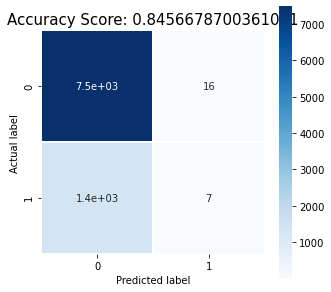

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

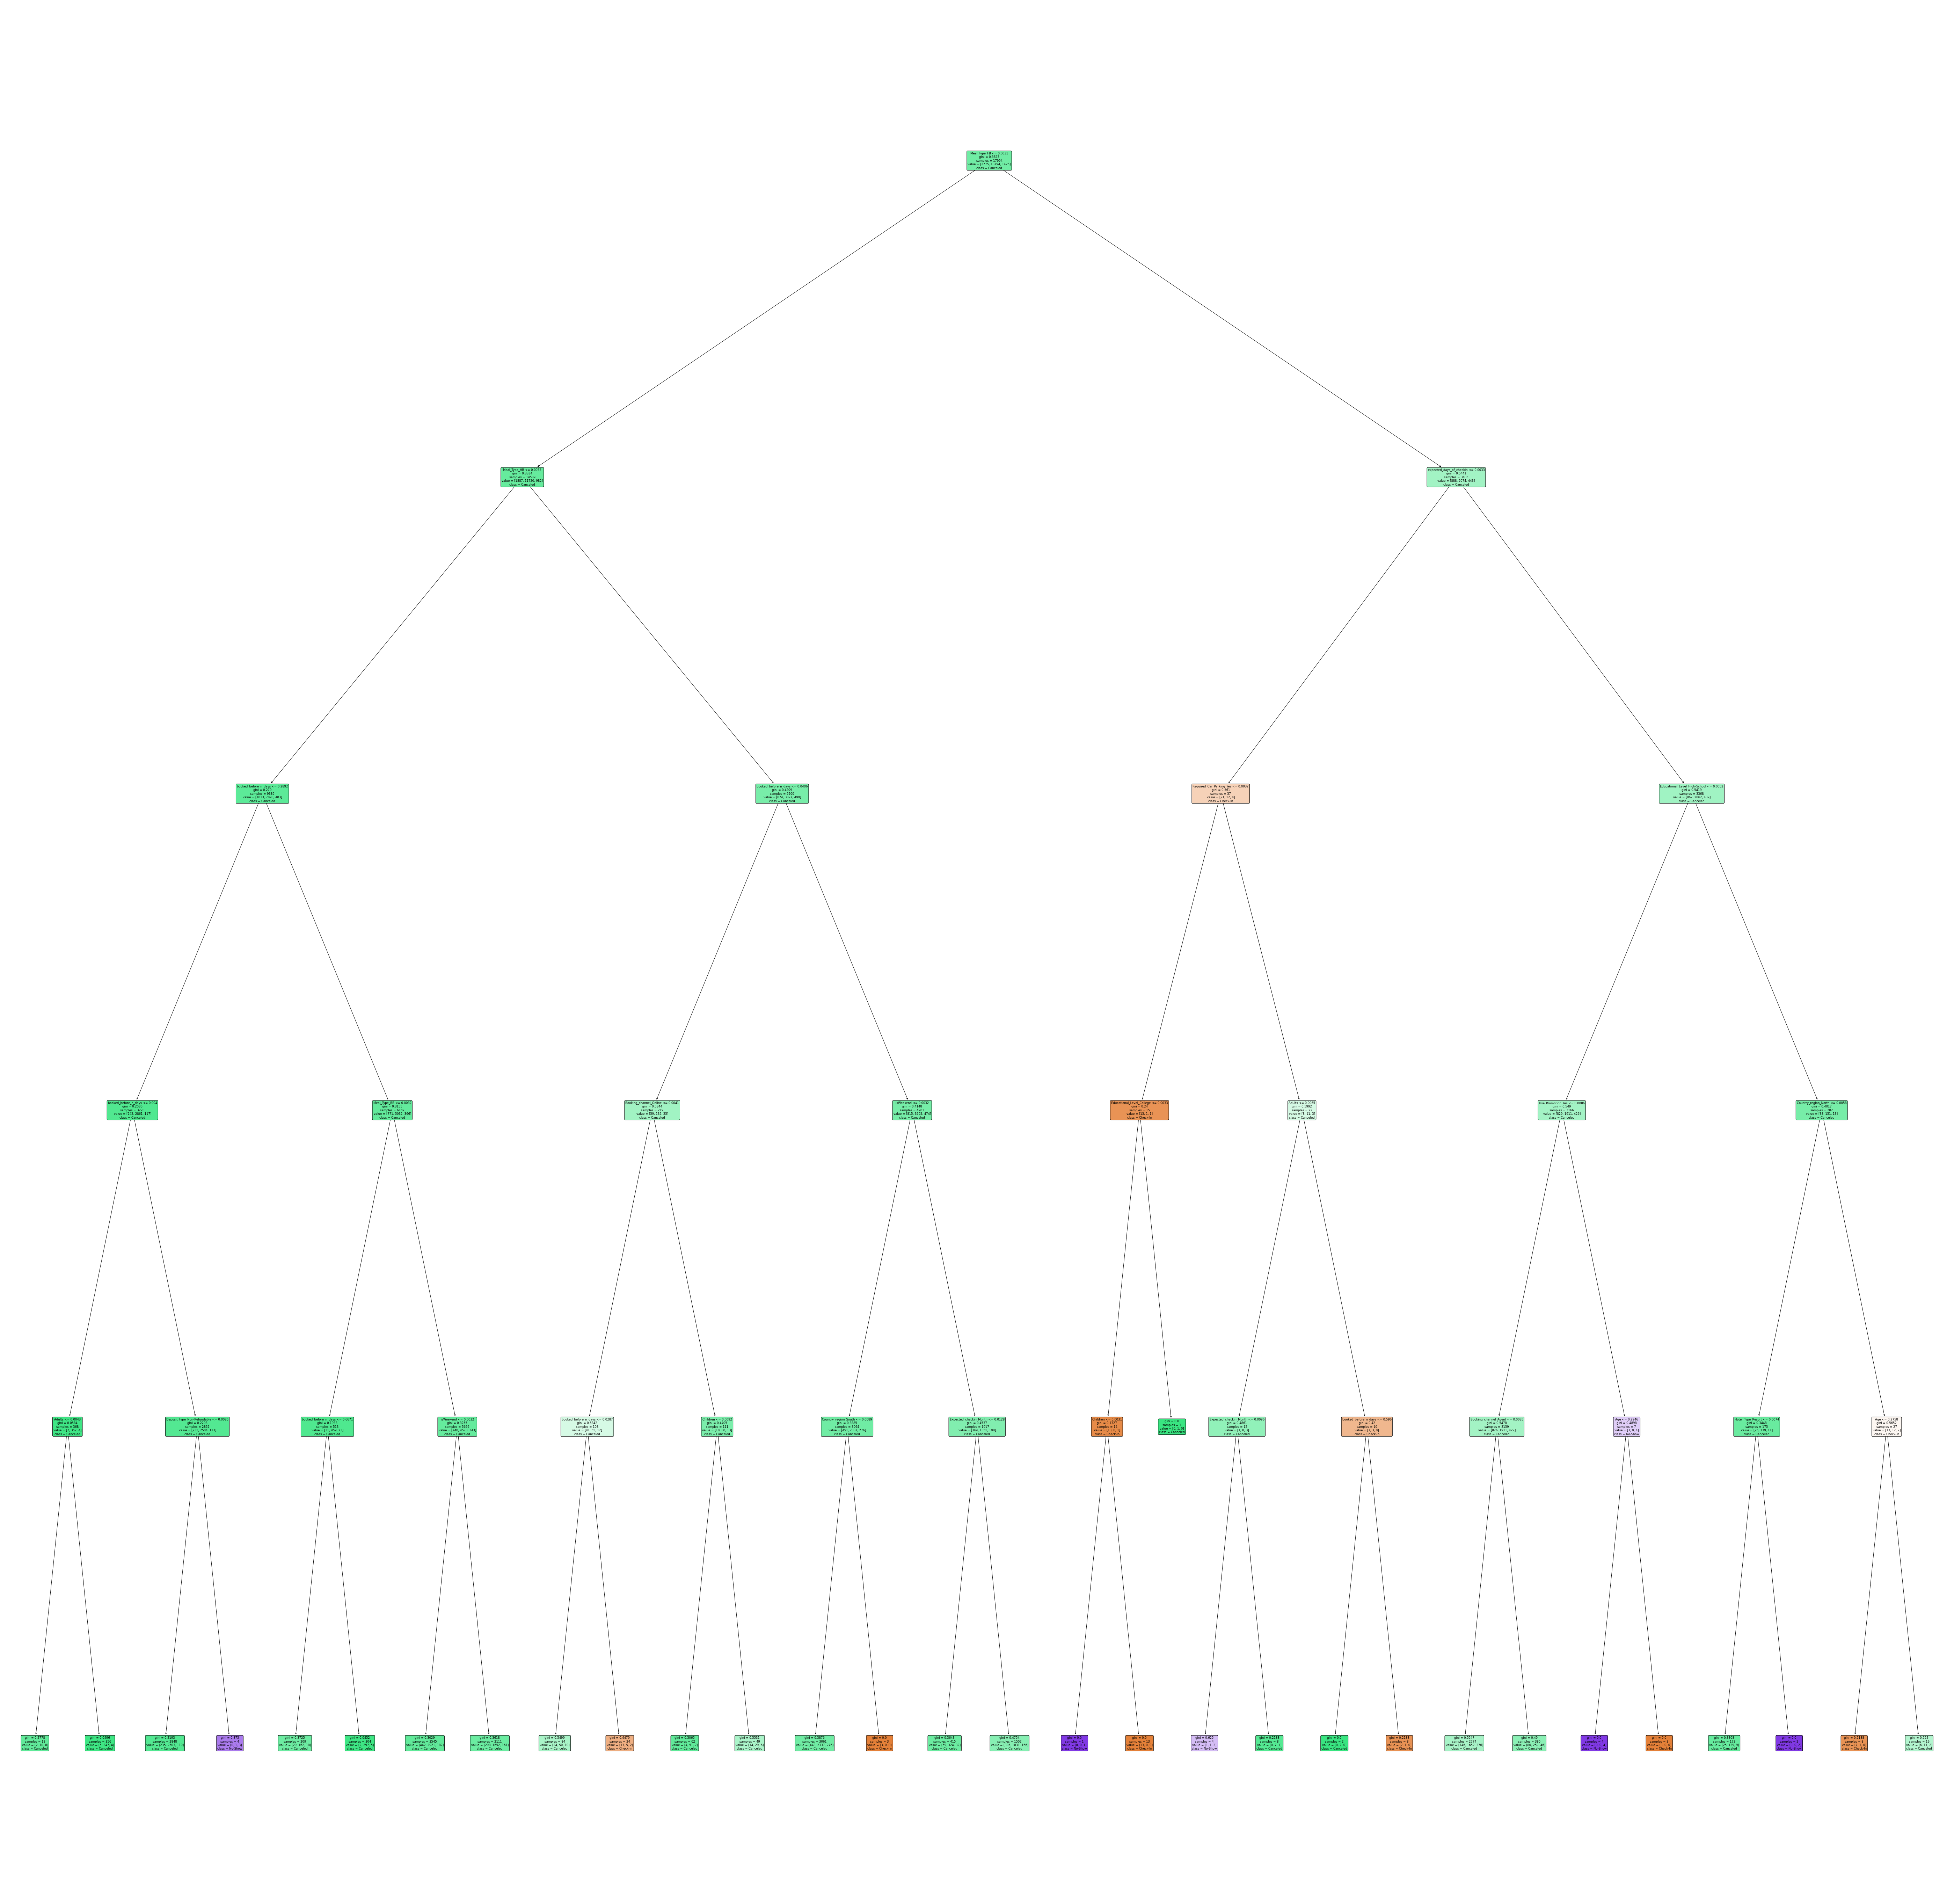

In [ ]:
plt.figure(figsize = (100,100))
dec_tree = plot_tree(decision_tree=dtree, feature_names = features.columns, 
                     class_names = list(data_prep['Reservation_Status'].unique()) , filled = True , precision = 4, rounded = True)

In [ ]:
# for col,score in zip(features.columns,dtree.feature_importances_):
#     print(col,score)

In [ ]:
list(data_prep['Reservation_Status'].unique())

['Check-In', 'Canceled', 'No-Show']

Age                              int64
Adults                           int64
Children                         int64
Babies                           int64
Discount_Rate                    int64
Room_Rate                        int64
Expected_checkin_Year            int64
Expected_checkin_Month           int64
expected_days_of_checkin         int64
booked_before_n_days             int64
isWeekend                         bool
Gender_F                         uint8
Gender_M                         uint8
Ethnicity_African American       uint8
Ethnicity_Asian American         uint8
Ethnicity_Latino                 uint8
Ethnicity_caucasian              uint8
Educational_Level_College        uint8
Educational_Level_Grad           uint8
Educational_Level_High-School    uint8
Educational_Level_Mid-School     uint8
Income_25K --50K                 uint8
Income_50K -- 100K               uint8
Income_<25K                      uint8
Income_>100K                     uint8
Country_region_East      